## Lab03 : Classification Decision Tree
### Name :
### ID :

Decision Tree is a supervised learning method used for classification and may be in regression. Decision trees learn from data to approximate a sine curve with a set of if-then-else decision rules. The deeper the tree, the more complex the decision rules and the fitter the model.Decision tree builds classification models in the form of a tree structure It breaks down a data set into smaller and smaller subsets The final result is a tree with decision nodes and leaf nodes. A decision node has two or more branches. Leaf node represents a classification or decision. The topmost decision node in a tree which corresponds to the best predictor called root node.

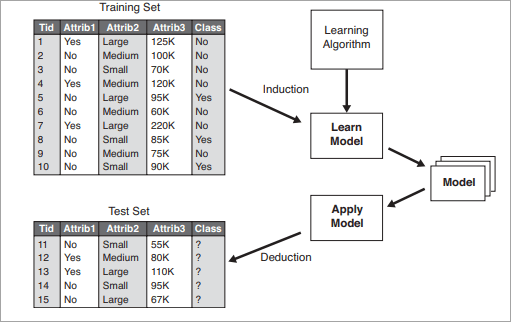

In [ ]:
from IPython.display import Image
Image(filename='Classification.png')

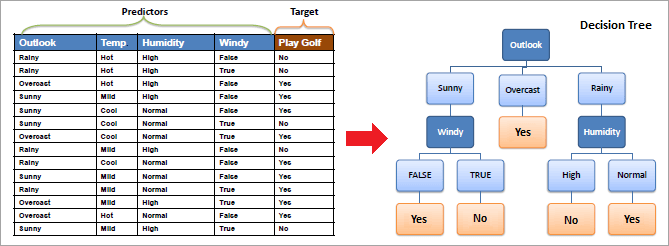

In [ ]:
Image(filename='DTAnswer.png')

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 9.1 MB/s eta 0:00:00


In [ ]:
!pip install utils

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13905 sha256=99f49e3d3255bf2a1391bb92bec6575d7942880d59bff673d5c98171740de477
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils


In [ ]:
import utils
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from catboost.datasets import titanic
titanic_train, titanic_test = titanic()
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


check for **Null** values.

In [ ]:
titanic_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Plot Features that have Nulls to decide which stratgy do we use

### Age

In [ ]:
titanic_train.Age.nunique()

88

<Axes: xlabel='Age', ylabel='Count'>

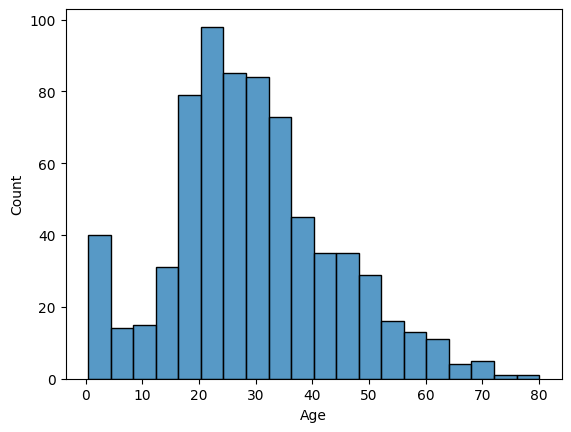

In [ ]:
sns.histplot(titanic_train.Age)

Fill Null values

In [ ]:
# Train

titanic_train.Age[titanic_train.Age.isna()] = titanic_train.Age.mean()
print(titanic_train.Age.isna().sum())

0


<ipython-input-12-d899434423ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_train.Age[titanic_train.Age.isna()] = titanic_train.Age.mean()


In [ ]:
titanic_train.Age.mean()

29.69911764705882

In [ ]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Cabin

In [ ]:
titanicdata=titanic_train.drop(['Cabin'],axis=1)

### Embarked

In [ ]:
titanicdata.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

<Axes: xlabel='Embarked', ylabel='Count'>

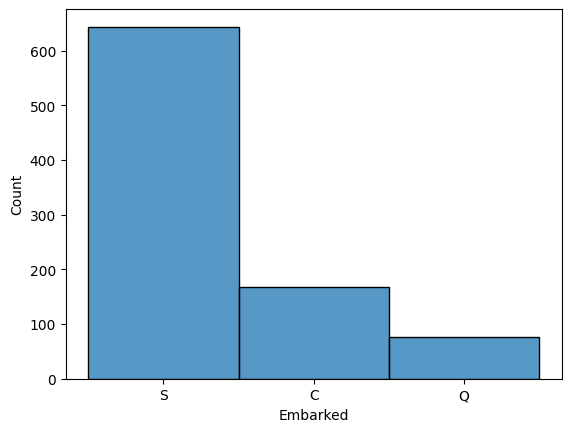

In [ ]:
sns.histplot(titanicdata.Embarked)

In [ ]:
titanicdata.Embarked.mode()

0    S
Name: Embarked, dtype: object

Fill Null values

In [ ]:

titanicdata.Embarked[titanicdata.Embarked.isna()] = titanicdata.Embarked.mode()[0]
print(titanicdata.Embarked.isna().sum())


0


<ipython-input-21-3927d922becd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanicdata.Embarked[titanicdata.Embarked.isna()] = titanicdata.Embarked.mode()[0]


### Remove Features that is useless

In [ ]:
titanicdata = titanicdata.drop(['PassengerId','Name','Ticket'],axis=1)


In [ ]:
titanicdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


### Apply One-Hot-Encoding to Categorical Features

In [ ]:
#use get dummies instead
encoded_data=pd.get_dummies(titanicdata,columns=['Sex','Embarked'])


In [ ]:
encoded_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,1,19.000000,0,0,30.0000,1,0,0,0,1
888,0,3,29.699118,1,2,23.4500,1,0,0,0,1
889,1,1,26.000000,0,0,30.0000,0,1,1,0,0


### **OR** Ordinal encoding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(titanicdata)
ordinal_encoded = enc.transform(titanicdata)
#ordinaldf=pd.DataFrame(ordinal_encoded,columns=[''])
ordinal_encoded

array([[  0.,   2.,   1., ...,   0.,  18.,   2.],
       [  1.,   0.,   0., ...,   0., 207.,   0.],
       [  1.,   2.,   0., ...,   0.,  41.,   2.],
       ...,
       [  0.,   2.,   0., ...,   2., 131.,   2.],
       [  1.,   0.,   1., ...,   0., 153.,   0.],
       [  0.,   2.,   1., ...,   0.,  30.,   1.]])

### Split Data into X,Y

In [ ]:
# Train
X = encoded_data.drop('Survived',axis=1)
Y = encoded_data['Survived']

### Split Train Data into Train and Validation sets

In [ ]:
Xtrain,Xval, Ytrain,Yval= train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)

In [ ]:
Xtrain.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
692,3,29.699118,0,0,56.4958,0,1,0,0,1
481,2,29.699118,0,0,0.0000,0,1,0,0,1
527,1,29.699118,0,0,221.7792,0,1,0,0,1
855,3,18.000000,0,1,9.3500,1,0,0,0,1
801,2,31.000000,1,1,26.2500,1,0,0,0,1


In [ ]:
Ytrain.head()

692    1
481    0
527    0
855    1
801    1
Name: Survived, dtype: int64

### Decision Tree Classifier

In [ ]:
DTC = DecisionTreeClassifier(criterion = "entropy",max_depth=7,random_state=42)
DTC.fit(Xtrain,Ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=42)

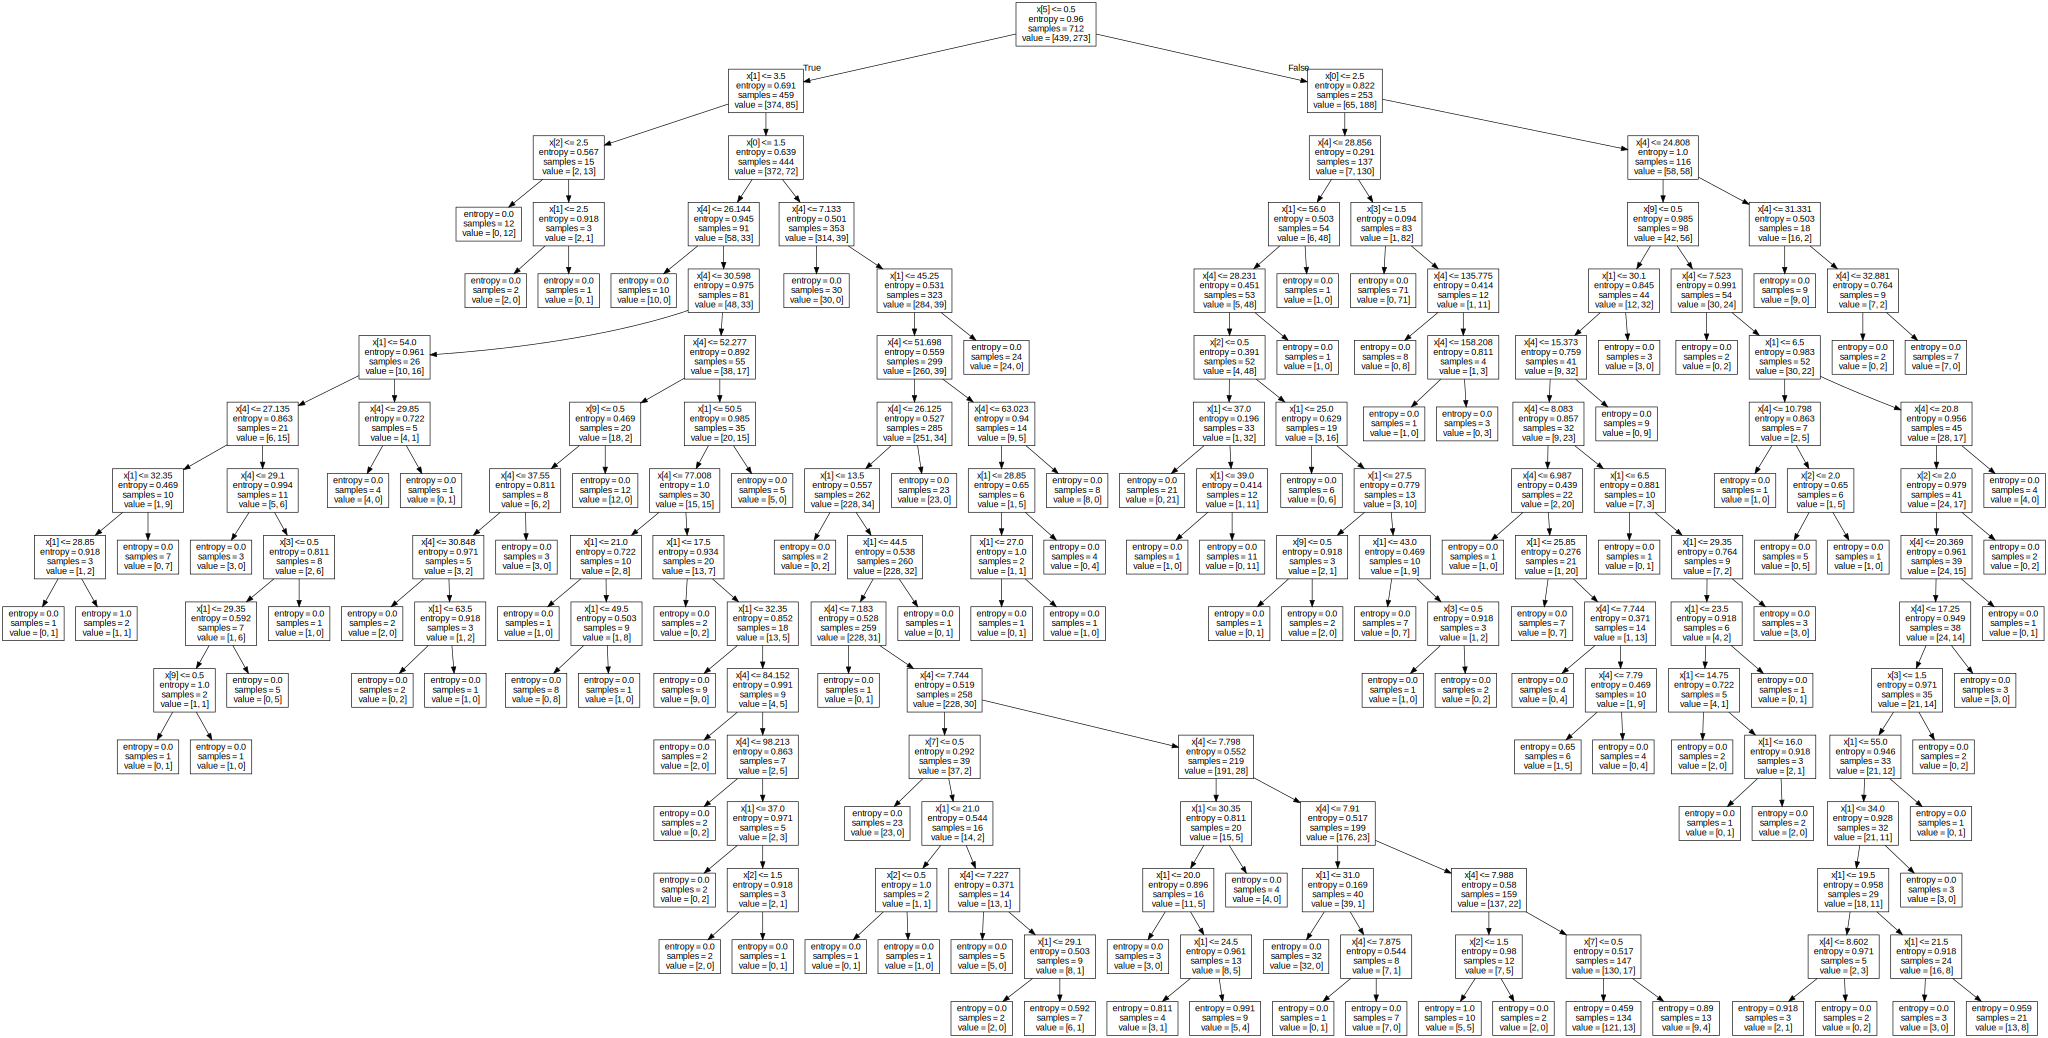

In [ ]:
import graphviz
dot_data=tree.export_graphviz(DTC)
graph = graphviz.Source(dot_data, format="png")
graph

In [ ]:
Ypredict = DTC.predict(Xval)
accuracy_score(Yval,Ypredict)

0.7877094972067039

In [ ]:
y_train_predict=DTC.predict(Xtrain)
y_test_predict=DTC.predict(Xval)
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(Ytrain,y_train_predict)
test_acc=accuracy_score(Yval,y_test_predict)
print("training acc = ",train_acc)
print("test acc = ",test_acc)

training acc =  0.8806179775280899
test acc =  0.7877094972067039


**Grid Search**

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score

def get_grid_search():

    #cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    params = {
        "criterion": ['gini', 'entropy'],
        "max_depth": list(np.arange(1,15)),
        "min_samples_leaf": list(np.arange(2, 10)),
        "min_samples_split": list(np.arange(2,10))
             }

    #scoring_fnc = make_scorer(r2_score(y_train, y_train_pred))

    grid = GridSearchCV(DTC, params, scoring='accuracy')

    grid.fit(Xtrain, Ytrain)

    print(grid.best_estimator_)
get_grid_search()

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=6,
                       random_state=42)


In [ ]:
def predictions():
    clf = tree.DecisionTreeClassifier(max_depth=7, min_samples_leaf=5, random_state=42)
    clf.fit(Xtrain, Ytrain)
    y_train_predict=clf.predict(Xtrain)
    y_test_predict=clf.predict(Xval)
    from sklearn.metrics import accuracy_score
    train_acc=accuracy_score(Ytrain,y_train_predict)
    test_acc=accuracy_score(Yval,y_test_predict)
    print("training acc = ",train_acc)
    print("test acc = ",test_acc)
predictions()

training acc =  0.8707865168539326
test acc =  0.7821229050279329


## Lab Task

In [ ]:
import pandas as pd

data=pd.read_csv('car_evaluation.csv')
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


data.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

**Q:** write python code to print the data frame

**Q:** Write a Python code to check for **Null** values .

**Q:** Write a Python code to handle **Null** values if any .

**Q:** Write a Python code to split **Data** into **Feature** and **Label**.

**Q:** Write a Python code Encode categorical **Feature**.

**Q:** Write a Python code to split **Features** and **Labels** into **Train** and **Test**.

**Q:** Write a Python code to Create **DecisionTreeClassifier** Object.

**Q:** Write a Python code to get **score** of **DecisionTreeClassifier** Object. get the train and test accuracy and comment

In [ ]:
tree.plot_tree(DTC,filled=True)